### Introduce DHI Southern North Sea WaterBench
[WaterBench SoutherNorthSea](https://github.com/DHI/WaterBench-MIKE21HD-SouthernNorthSea) \
The notebook introduces the model and the observations for the Southern North Sea.

##### Import necessary modules

In [7]:
%load_ext autoreload
%autoreload 2
import mikeio
from pathlib import Path
import matplotlib.pyplot as plt
from helpers import plot_zones
BASE_OBS_PATH = Path(r"..\data\observations")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Load bathymetry, Manning values and observations

In [8]:
path_bathymetry = Path(r"..\data\input\Mesh_8000_elems_HD_v2.mesh")
path_manning = Path(r"..\data\input\ManningM.dfsu")

path_observations = []
path_observations.append(BASE_OBS_PATH / "Altimetry_wl_3a.dfs0")
path_observations.append(BASE_OBS_PATH / "Altimetry_wl_3b.dfs0")
path_observations.append(BASE_OBS_PATH / "Altimetry_wl_6a.dfs0")

satellite_names = ["Sentinel 3a", "Sentinel 3b", "Sentinel 6a"]

In [9]:
bathymetry = mikeio.open(path_bathymetry)
manning = mikeio.read(path_manning)

observations = [mikeio.read(obs) for obs in path_observations]

##### Model Outline and Bathymetry
The model domain covers the southern part of the northern North Sea and the entrance to the English Channel. Open boundary conditions are applied along the northern edge of the domain and across the cross-section of the English Channel. The remaining boundaries are defined as land boundaries

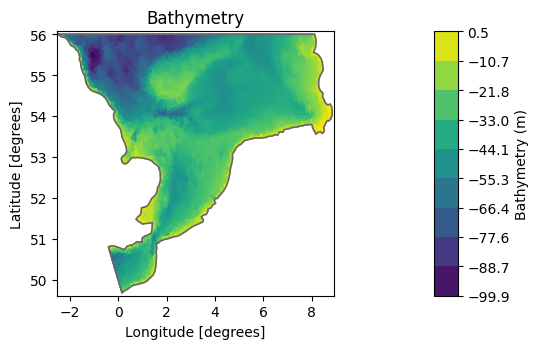

In [15]:
fig, ax = plt.subplots()
bathymetry.plot(ax = ax)

fig.savefig("../images/sns_model_domain.png", dpi=300, bbox_inches="tight")

##### Zone Selection
Based on the bathymetric data, distinct zones with similar hydraulic characteristics have been delineated. In total, 7 zones were identified, each assumed to exhibit relatively uniform Manning’s roughness behavior. These zones form the basis for assigning 10 separate Manning values, which will be subject to parameter estimation during the model calibration process.

The currently loaded file contains placeholder (dummy) Manning’s roughness coefficients used solely to distinguish between zones. These values will be overwritten with meaningful parameters during the calibration phase.

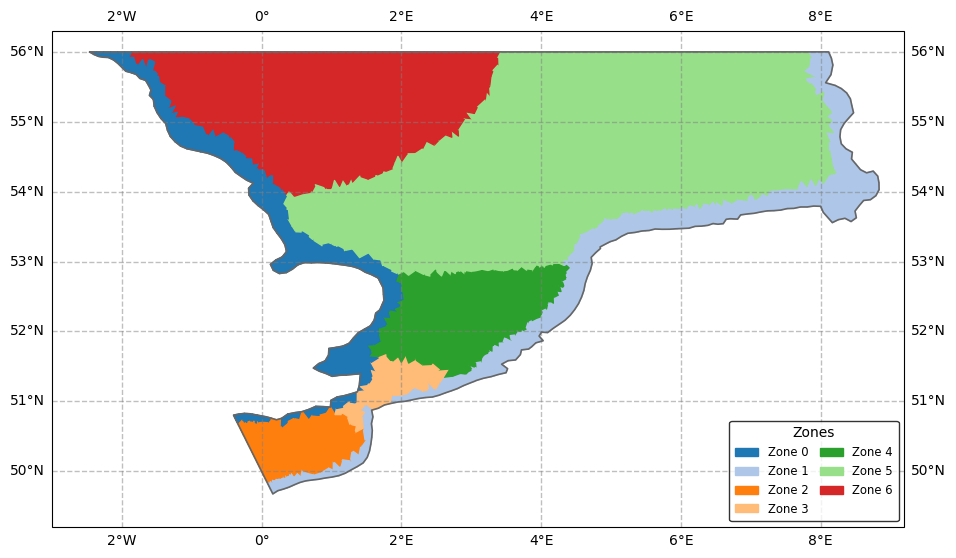

In [11]:
plot_zones(manning.manning, savepath="../images/sns_manning_zones.png")

##### Satellite Altimetry
For the purpose of model calibration, satellite altimetry data from the Sentinel mission will be used. An overview of the spatial coverage of the individual satellite tracks is provided below. It is important to note that altimetry data near the coastline is often affected by quality issues; such data has already been filtered and excluded from the dataset.

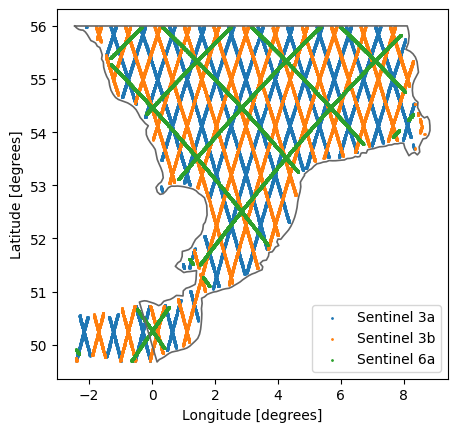

In [16]:
fig, ax = plt.subplots()
bathymetry.plot(ax = ax, plot_type="outline_only")

for obs, name in zip(observations, satellite_names):
    ax.scatter(obs.longitude.values, obs.latitude.values, label = name, s = 1)

plt.legend()
fig.savefig("../images/sns_observations.png", dpi=300, bbox_inches="tight")